# Imports

In [1]:
import pandas as pd
import spacy
import json
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
import random
import pickle

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def custom_mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2 * ((abs(3.97 - y)/(0.417342))**2 + 1))/y.shape[0]

# Reading Data

In [4]:
data = pd.read_csv('./drive/My Drive/ML Project/data/data_train.csv', na_values='.')

In [5]:
def shuffle(x,y,z):
        t = []
        for i in range(len(x)):
            t.append([x[i],y[i],z[i]])
        random.seed(69)
        random.shuffle(t)
        x = [np.array(i[0]) for i in t]
        y = [np.array(i[1]) for i in t]
        z = [np.array(i[2]) for i in t]
        return x, y, z

In [6]:
def write(data, filename):
    with open('./drive/My Drive/ML Project/' + filename + '.json', 'w') as file:
        json.dump(data, file)

def read(filename):
    with open('./drive/My Drive/ML Project/' + filename + '.json', 'r') as file:
        data = json.load(file)
    return data

In [7]:
def compare(word):
    if word in words['NOUN']:
        return words['NOUN'][word]
    elif word in words['VERB']:
        return words['VERB'][word]
    elif word in words['ADJ']:
        return words['ADJ'][word]
    else:
        return 0

In [8]:
summary = read('summary_train')
dictionary = summary['dictionary']
dictionary = list(set(dictionary))
words = summary['words']
dictionary = sorted(dictionary, key=compare, reverse=True)
print(len(summary['X']))

16206


In [9]:
word_index = {}

for i in range(len(dictionary)):
    word_index[dictionary[i]] = i

summaryX = []

for i in tqdm(range(len(summary['X']))):
    new_x = [0 for i in range(len(dictionary))]
    if(summary['imageLink'][i]!=data['imageLink'][i]):
      print("ouch")
    for word in summary['X'][i]:
        if word not in word_index:
            continue
        new_x[word_index[word]] += 1
    summaryX.append(new_x)
Y = data.values[:,6]
#numericalX, summaryX, Y = shuffle(numericalX, summaryX, Y)

100%|██████████| 16206/16206 [00:09<00:00, 1800.19it/s]


In [10]:
numericalX = (data.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')


# Models

In [11]:
def model(input_shape, regularization = 0):
    X_input = Input(input_shape)
    X = Dense(50, activation='tanh',kernel_regularizer=regularizers.l2(regularization))(X_input)
    X = Dense(50, activation='relu',kernel_regularizer=regularizers.l2(regularization))(X)
    X = Dense(50, activation='relu',kernel_regularizer=regularizers.l2(regularization))(X)
    X = Dense(1)(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [ ]:
def runNN(X_train, X_test, y_train, y_test):
  happyModel = model((X.shape[1]))
  happyModel.compile(optimizer = 'adam', loss = "mse", metrics = ["mse"])
  happyModel.fit(x = X_train, y = y_train, epochs = 5)
  loss, acc = happyModel.evaluate(x = X_test, y = y_test)
  return [happyModel.predict(x = X_train), happyModel.predict(x = X_test)]

In [ ]:
def runRandomForest(X_train, X_test, y_train, y_test):
  clf = RandomForestRegressor(n_estimators=200)
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  print("Test")
  print("Normal", mean_squared_error(y_hat, y_test))
  print("Custom", custom_mean_squared_error(y_hat, y_test))
  y_hatt = clf.predict(X_train)
  print("Train")
  print("Normal", mean_squared_error(y_hatt, y_train))
  print("Custom", custom_mean_squared_error(y_hatt, y_train))
  return [y_hatt, y_hat]

In [ ]:
def runDecisionTree(X_train, X_test, y_train, y_test):
  clf = DecisionTreeRegressor(max_depth=7)
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  print("Test")
  print("Normal", mean_squared_error(y_hat, y_test))
  print("Custom", custom_mean_squared_error(y_hat, y_test))
  y_hatt = clf.predict(X_train)
  print("Train")
  print("Normal", mean_squared_error(y_hatt, y_train))
  print("Custom", custom_mean_squared_error(y_hatt, y_train))
  return [y_hatt, y_hat]

In [ ]:
X = np.array(summaryX)
Y = data.values[:,6]
X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = X[:(4*len(X))//5], X[(4*len(X))//5:], np.array(Y[:(4*len(X))//5]), np.array(Y[(4*len(X))//5:])
preTestNN = runNN(X_train, X_test, y_train, y_test)

Epoch 1/5
406/406 [==============================] - 3s 6ms/step - loss: 1.9454 - mse: 1.9454
Epoch 2/5
406/406 [==============================] - 2s 6ms/step - loss: 0.1005 - mse: 0.1005
Epoch 3/5
406/406 [==============================] - 2s 6ms/step - loss: 0.0640 - mse: 0.0640
Epoch 4/5
406/406 [==============================] - 2s 6ms/step - loss: 0.0437 - mse: 0.0437
Epoch 5/5
102/102 [==============================] - 0s 2ms/step - loss: 0.1529 - mse: 0.1529


In [ ]:
X = np.array(numericalX)
Y = data.values[:,6]
X[:, 3] = np.log(X[:, 3] + 1)
X_train, X_test, y_train, y_test = X[:(4*len(X))//5], X[(4*len(X))//5:], np.array(Y[:(4*len(X))//5]), np.array(Y[(4*len(X))//5:])
preTestRF = runRandomForest(X_train, X_test, y_train, y_test)

Test
Normal 0.07758216211904144
Custom 0.3249553819993003
Train
Normal 0.010851624002291105
Custom 0.061464804259695825


In [ ]:
print(len(preTestNN), len(preTestRF))
print(len(preTestNN[0]), len(preTestRF[0]))
print(len(preTestNN[1]), len(preTestRF[1]))

2 2
12964 12964
3242 3242


In [ ]:
finalTrain = []
for i in range(len(preTestRF[0])):
  finalTrain.append([preTestNN[0][i][0], preTestRF[0][i]])
print(finalTrain[:5])
finalTest = []
for i in range(len(preTestRF[1])):
  finalTest.append([preTestNN[1][i][0], preTestRF[1][i]])
print(finalTest[:5])

[[3.3479369, 3.5211500000000036], [3.880363, 4.076900000000008], [4.178841, 4.236649999999994], [3.91414, 4.017700000000003], [3.7893171, 3.913200000000003]]
[[4.2031016, 4.392599999999998], [3.7712207, 3.9704000000000046], [4.047606, 4.100950000000009], [3.882244, 3.6841999999999957], [3.3775845, 4.063400000000002]]


In [ ]:
clf = LinearRegression()
clf.fit(finalTrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yHat = clf.predict(finalTest)
yHatAverage = [(finalTest[i][0] + finalTest[i][1])/2 for i in range(len(finalTest))]

In [ ]:
print(mean_squared_error(yHat, y_test))
print(custom_mean_squared_error(yHat, y_test))

0.07613671857441931
0.3085582001169311


In [ ]:
clf.coef_

array([0.22861442, 1.00927448])

In [ ]:
yHatT = clf.predict(finalTrain)

In [ ]:
mean_squared_error(yHatT, y_train)

0.005632723917318872

#Testing

In [12]:
summary = read('summary_test')

summary_test = []
data_test = pd.read_csv('./drive/My Drive/ML Project/data/data_test.csv', na_values='.')

for i in tqdm(range(len(summary['X']))):
    new_x = [0 for i in range(len(dictionary))]
    if(summary['imageLink'][i]!=data_test['imageLink'][i]):
      print("ouch")
    for word in summary['X'][i]:
        if word not in word_index:
            continue
        new_x[word_index[word]] += 1
    summary_test.append(new_x)

numerical_test = (data_test.values[:, [4, 5, 9, 11, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]).astype('float64')

100%|██████████| 4052/4052 [00:02<00:00, 1766.70it/s]


In [14]:
X = np.array(summaryX)
print(X.shape)
Y = data.values[:,6]
X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')
happyModel = model((X.shape[1]))
happyModel.compile(optimizer = 'adam', loss = "mse", metrics = ["mse"])
happyModel.fit(x = X, y = Y, epochs = 5)

weights = happyModel.get_weights()
# pickle.dump(weights, open('./drive/My Drive/ML Project/weights/EnsembleSummary.sav', 'wb'))

X_trainNN = happyModel.predict(x = X)

X = np.array(numericalX)
Y = data.values[:,6]
X[:, 3] = np.log(X[:, 3] + 1)
clf = RandomForestRegressor(n_estimators=200)
clf.fit(X, Y)
# pickle.dump(clf, open('./drive/My Drive/ML Project/weights/EnsembleRF.sav', 'wb'))
X_trainRF = clf.predict(X)


finalTrain = []
for i in range(len(X_trainRF)):
  finalTrain.append([X_trainNN[i], X_trainRF[i]])


ensemble_model = LinearRegression()
ensemble_model.fit(finalTrain, Y)


X = np.array(summary_test)
Y = data_test.values[:,6]
X = np.asarray(X).astype('float64')
Y = np.asarray(Y).astype('float64')
X_testNN = happyModel.predict(x = X)

X = np.array(numerical_test)
Y = data_test.values[:,6]
X[:, 3] = np.log(X[:, 3] + 1)
X_testRF = clf.predict(X)

finalTest = []
for i in range(len(X_testRF)):
  finalTest.append([X_testNN[i], X_testRF[i]])

(16206, 9948)
Epoch 1/5
507/507 [==============================] - 3s 5ms/step - loss: 1.6196 - mse: 1.6196
Epoch 2/5
507/507 [==============================] - 3s 5ms/step - loss: 0.0877 - mse: 0.0877
Epoch 3/5
507/507 [==============================] - 3s 5ms/step - loss: 0.0600 - mse: 0.0600
Epoch 4/5
507/507 [==============================] - 2s 5ms/step - loss: 0.0409 - mse: 0.0409
Epoch 5/5
507/507 [==============================] - 3s 5ms/step - loss: 0.0309 - mse: 0.0309


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [15]:
y_hat = ensemble_model.predict(finalTest)
# pickle.dump(ensemble_model, open('./drive/My Drive/ML Project/weights/ensemble_model.sav', 'wb'))
print(mean_squared_error(Y, y_hat))
print(custom_mean_squared_error(y_hat, Y))

0.07330251245017519
0.36168495426335


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

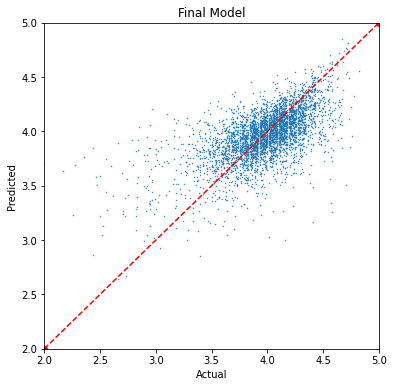

In [ ]:
plt.clf()
fig, ((ax1)) = plt.subplots(1, 1)
ax1.set_title('Final Model')
ax1.scatter(Y, y_hat, s = 0.2)
ax1.plot((2, 5), (2, 5), 'ro--')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_xlim(2, 5)
ax1.set_ylim(2, 5)
fig.set_size_inches(6, 6)